In [43]:
import json
import os  # Create directories, list files
import zipfile
import shutil
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D 
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [5]:
import splitfolders
splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.6, 0.4))

Copying files: 2000 files [00:03, 640.63 files/s]


In [2]:
input_folder="dataset"
base_dir="dataset_split2"

In [3]:
import os
Train = os.path.join(base_dir, 'train')
Val = os.path.join(base_dir, 'val')

In [29]:
# define generator
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    
  #  shear_range = 0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
  #  vertical_flip=True,
  #  rotation_range=20,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
    rescale = 1./255,
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2, horizontal_flip=True, 
    fill_mode="nearest"
    
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [70]:
batch_size = 20

In [71]:
train_generator = train_gen.flow_from_directory(
    Train,
    target_size=(150, 150),
    class_mode='categorical',
    color_mode="rgb",
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    Val,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)


Found 1200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import backend as K
from keras.layers import Dense,Flatten

In [8]:
import tensorflow as tf

In [9]:
from keras.applications.vgg19 import VGG19

vgg19_model = VGG19(input_shape =(150,150,3) , include_top=False)

In [10]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
model_mod1 = vgg19_model.layers[-1].output
flatten = tf.keras.layers.Flatten()(model_mod1)
denser = tf.keras.layers.Dense(128, activation = 'relu')(flatten)
denser = tf.keras.layers.Dense(256, activation = 'relu')(flatten)
dropout = tf.keras.layers.Dropout(0.5)(denser)
prediction = tf.keras.layers.Dense(4, activation = 'softmax')(dropout)

In [12]:
model3= tf.keras.Model(inputs=vgg19_model.input, outputs=prediction)

In [13]:
for layer in vgg19_model.layers:
  layer.trainable = False

In [14]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
model3.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# filepath = "/content/drive/MyDrive/projek0//model/modeldropout.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
#                              save_best_only=True, mode='max')
                              
                              
# callbacks_list = [checkpoint]

history2 = model3.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,)

Epoch 1/100
19/19 [==============================] - 47s 3s/step - loss: 0.6796 - accuracy: 0.7217 - val_loss: 0.4795 - val_accuracy: 0.8238
Epoch 2/100
19/19 [==============================] - 38s 2s/step - loss: 0.5288 - accuracy: 0.7875 - val_loss: 0.4138 - val_accuracy: 0.8425
Epoch 3/100
19/19 [==============================] - 38s 2s/step - loss: 0.4765 - accuracy: 0.8317 - val_loss: 0.3878 - val_accuracy: 0.8450
Epoch 4/100
19/19 [==============================] - 35s 2s/step - loss: 0.4455 - accuracy: 0.8308 - val_loss: 0.3465 - val_accuracy: 0.8675
Epoch 5/100
19/19 [==============================] - 34s 2s/step - loss: 0.4272 - accuracy: 0.8350 - val_loss: 0.3476 - val_accuracy: 0.8512
Epoch 6/100
19/19 [==============================] - 34s 2s/step - loss: 0.4117 - accuracy: 0.8233 - val_loss: 0.3331 - val_accuracy: 0.8662
Epoch 7/100
19/19 [==============================] - 34s 2s/step - loss: 0.3743 - accuracy: 0.8500 - val_loss: 0.3087 - val_accuracy: 0.8800
Epoch 8/100
1

Epoch 59/100
19/19 [==============================] - 29s 2s/step - loss: 0.2015 - accuracy: 0.9200 - val_loss: 0.2087 - val_accuracy: 0.9013
Epoch 60/100
19/19 [==============================] - 29s 2s/step - loss: 0.1795 - accuracy: 0.9317 - val_loss: 0.2105 - val_accuracy: 0.9050
Epoch 61/100
19/19 [==============================] - 29s 2s/step - loss: 0.1735 - accuracy: 0.9425 - val_loss: 0.2112 - val_accuracy: 0.9100
Epoch 62/100
19/19 [==============================] - 29s 2s/step - loss: 0.1596 - accuracy: 0.9483 - val_loss: 0.2254 - val_accuracy: 0.8975
Epoch 63/100
19/19 [==============================] - 29s 2s/step - loss: 0.1541 - accuracy: 0.9433 - val_loss: 0.2081 - val_accuracy: 0.8950
Epoch 64/100
19/19 [==============================] - 29s 2s/step - loss: 0.1748 - accuracy: 0.9383 - val_loss: 0.2146 - val_accuracy: 0.8975
Epoch 65/100
19/19 [==============================] - 29s 2s/step - loss: 0.1608 - accuracy: 0.9433 - val_loss: 0.2134 - val_accuracy: 0.9013
Epoch 

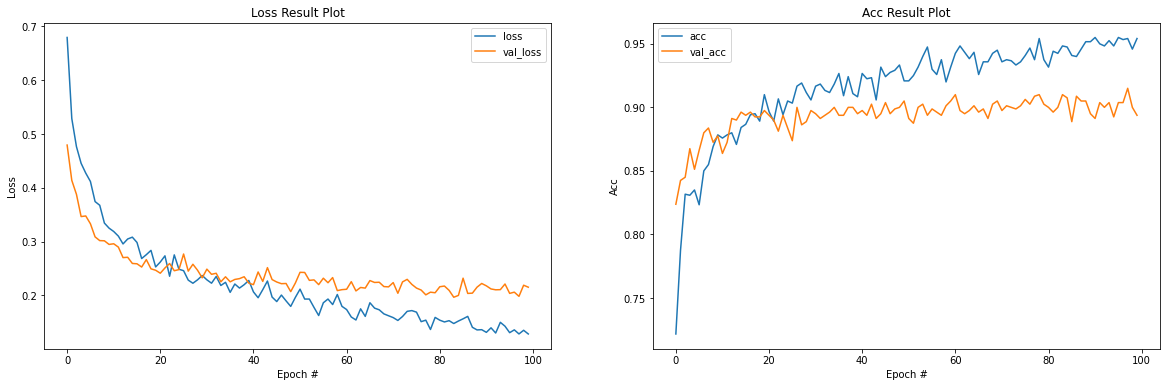

In [24]:
#plot model 1
fig, (plt1, plt2) = plt.subplots(1,2, figsize=(20,6)) #buat bikin subplot

plt1.figsize=(10,8)
plt1.plot(np.arange(0, 100), history2.history["loss"], label="loss")
plt1.plot(np.arange(0, 100), history2.history["val_loss"], label="val_loss")
plt1.set_title("Loss Result Plot")
plt1.set_xlabel("Epoch #")
plt1.set_ylabel("Loss")
plt1.legend()

plt2.figsize=(10,8)
plt2.plot(np.arange(0, 100), history2.history["accuracy"], label="acc")
plt2.plot(np.arange(0, 100), history2.history["val_accuracy"], label="val_acc")
plt2.set_title("Acc Result Plot")
plt2.set_xlabel("Epoch #")
plt2.set_ylabel("Acc")
plt2.legend()

In [25]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

ypred = model3.predict(validation_generator)
prediction = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       200
           1       0.96      1.00      0.98       200
           2       0.97      0.98      0.98       200
           3       0.80      0.82      0.81       200

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



Confusion matrix, without normalization
[[78  1  1 15]
 [ 0 95  0  0]
 [ 2  0 93  0]
 [13  1  1 80]]


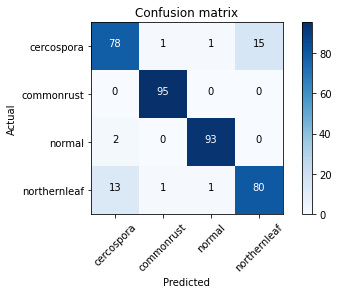

In [20]:
#Evaluasi menggunakan confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cnf_matrix=confusion_matrix(validation_generator.classes,prediction)
plot_confusion_matrix(cnf_matrix, classes=validation_generator.class_indices)

In [22]:
model3.save("vgg19.h5")

In [ ]:
from keras.models import load_model

# load model
model = load_model('vgg16.h5')

In [ ]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

ypred = model.predict(validation_generator)
prediction = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction))

In [ ]:
#Evaluasi menggunakan confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cnf_matrix=confusion_matrix(validation_generator.classes,prediction)
plot_confusion_matrix(cnf_matrix, classes=validation_generator.class_indices)

In [37]:
model5 = Sequential()

model5.add(InputLayer(input_shape=[150,150,3]))
model5.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=2, padding='same'))
model5.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=2, padding='same'))
model5.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPool2D(pool_size=2, padding='same'))
model5.add(Dropout(0.25))
model5.add(Flatten())

# Fully Connected Layer
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(4, activation='sigmoid'))

# Print model summary
print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 75, 75, 16)        448       
                                                                 
 batch_normalization_12 (Bat  (None, 75, 75, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 38, 38, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 19, 19, 32)        4640      
                                                                 
 batch_normalization_13 (Bat  (None, 19, 19, 32)       128       
 chNormalization)                                                
                                                      

In [41]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

base_model=InceptionResNetV2(weights='imagenet',include_top=False, input_shape=(150, 150, 3))

219070464/219055592 [==============================] - 76s 0us/step


In [44]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)
model6 = Model(inputs=base_model.input, outputs=predictions)

In [45]:
model6.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 74, 74, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization_15 (BatchN  (None, 74, 74, 32)  96          ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                            

 block8_3_conv (Conv2D)         (None, 3, 3, 2080)   933920      ['block8_3_mixed[0][0]']         
                                                                                                  
 block8_3 (Lambda)              (None, 3, 3, 2080)   0           ['block8_2_ac[0][0]',            
                                                                  'block8_3_conv[0][0]']          
                                                                                                  
 block8_3_ac (Activation)       (None, 3, 3, 2080)   0           ['block8_3[0][0]']               
                                                                                                  
 conv2d_191 (Conv2D)            (None, 3, 3, 192)    399360      ['block8_3_ac[0][0]']            
                                                                                                  
 batch_normalization_191 (Batch  (None, 3, 3, 192)   576         ['conv2d_191[0][0]']             
 Normaliza

In [46]:
for layer in base_model.layers:
    layer.trainable = False

In [47]:
model6.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history6 = model6.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,)

Epoch 1/100
60/60 [==============================] - 48s 556ms/step - loss: 2.7630 - accuracy: 0.6042 - val_loss: 0.8866 - val_accuracy: 0.7625
Epoch 2/100
60/60 [==============================] - 31s 524ms/step - loss: 0.9310 - accuracy: 0.7550 - val_loss: 0.4963 - val_accuracy: 0.8275
Epoch 3/100
60/60 [==============================] - 31s 526ms/step - loss: 0.7707 - accuracy: 0.7767 - val_loss: 0.4908 - val_accuracy: 0.8000
Epoch 4/100
60/60 [==============================] - 40s 670ms/step - loss: 0.6818 - accuracy: 0.7975 - val_loss: 0.5387 - val_accuracy: 0.8062
Epoch 5/100
60/60 [==============================] - 41s 680ms/step - loss: 0.6219 - accuracy: 0.8075 - val_loss: 0.6577 - val_accuracy: 0.8012
Epoch 6/100
60/60 [==============================] - 54s 907ms/step - loss: 0.5498 - accuracy: 0.8167 - val_loss: 0.3356 - val_accuracy: 0.8737
Epoch 7/100
60/60 [==============================] - 52s 876ms/step - loss: 0.5809 - accuracy: 0.8192 - val_loss: 0.4783 - val_accuracy:

60/60 [==============================] - 39s 647ms/step - loss: 0.3377 - accuracy: 0.9033 - val_loss: 0.3890 - val_accuracy: 0.8988
Epoch 58/100
60/60 [==============================] - 39s 653ms/step - loss: 0.3756 - accuracy: 0.9050 - val_loss: 0.8296 - val_accuracy: 0.8650
Epoch 59/100
60/60 [==============================] - 38s 626ms/step - loss: 0.3322 - accuracy: 0.9100 - val_loss: 0.5446 - val_accuracy: 0.8562
Epoch 60/100
60/60 [==============================] - 37s 617ms/step - loss: 0.3121 - accuracy: 0.9083 - val_loss: 0.4239 - val_accuracy: 0.8950
Epoch 61/100
60/60 [==============================] - 37s 609ms/step - loss: 0.3487 - accuracy: 0.9075 - val_loss: 0.4027 - val_accuracy: 0.8813
Epoch 62/100
60/60 [==============================] - 39s 654ms/step - loss: 0.2984 - accuracy: 0.9058 - val_loss: 0.4124 - val_accuracy: 0.8938
Epoch 63/100
60/60 [==============================] - 41s 674ms/step - loss: 0.2676 - accuracy: 0.9100 - val_loss: 0.4806 - val_accuracy: 0.888

In [49]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

ypred = model6.predict(validation_generator)
prediction = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       200
           1       0.98      1.00      0.99       200
           2       0.96      1.00      0.98       200
           3       0.84      0.75      0.79       200

    accuracy                           0.90       800
   macro avg       0.89      0.90      0.89       800
weighted avg       0.89      0.90      0.89       800



In [72]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

base_model1=InceptionResNetV2(include_top=False, input_shape=(150, 150, 3))

ResourceExhaustedError: failed to allocate memory [Op:Mul]

In [ ]:
x1 = base_model1.output
x1 = GlobalAveragePooling2D()(x1)
x1 = Dense(1024, activation = 'relu')(x1)
x1 = Dropout(0.5)(x1)
predictions = Dense(4, activation='softmax')(x1)
model7 = Model(inputs=base_model1.input, outputs=predictions)

In [ ]:
model7.summary()

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [68]:
model7.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
history7 = model7.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

ypred = model6.predict(validation_generator)
prediction = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction))